In [1]:
def fun(x):
    return (-2.7 * x**3) - (1.48 * x**2) + (19.23 * x) + 6.35

In [2]:
def bisec(a, b, eps):
    output_file = open('lab1output.txt','w')
    output_mode = True
    print('Для вывода результатов на экран нажмите 1, в файл - 2')
    try:
        inputted = int(input())
        if (inputted == 1):
            output_mode = True
        elif (inputted == 2):
            output_mode = False
        else:
            print('Ошибка. Пожалуйста, попробуйте еще раз.')
            sys.exit(0)
    except ValueError as exc:
        print('Ошибка. Пожалуйста, попробуйте еще раз.')
        sys.exit(0)
    
    
    i = 0
    c = 0
    any_roots = True
    
    while(abs(a-b)>eps):
        i += 1
        c = (a+b)/2
        if ((fun(a)*fun(c)) <= 0):
            b=c
        elif ((fun(b)*fun(c)) < 0):
            a=c
        else:
            any_roots = False
            break
       
    
    if not any_roots:
        if(output_mode):
            print('На данном интервале не было найдено ни одного корня')
            sys.exit(0)
        else:
            output_file.write("На данном интервале не было найдено ни одного корня\n")
            sys.exit(0)
    else:
        if(output_mode):
            print(f"x = {c}, y(x) = {fun(c):.10f}, итераций {i}")
        else:
            output_file.write(f"x = {c}, y(x) = {fun(c):.10f}, итераций {i}\n")
    output_file.close()

In [18]:
def fun_first_derivative(x):
    return (-3*2.7 * x**2) - (2*1.48 * x) + 19.23

def fun_second_derivative(x):
    return (-6*2.7 * x) - 2*1.48


def newton(a, b, eps):
    output_file = open('lab1output.txt','a')
    output_mode = True
    print('Для вывода результатов на экран нажмите 1, в файл - 2')
    try:
        inputted = int(input())
        if (inputted == 1):
            output_mode = True
        elif (inputted == 2):
            output_mode = False
        else:
            print('Ошибка. Пожалуйста, попробуйте еще раз.')
            sys.exit(0)
    except ValueError as exc:
        print('Ошибка. Пожалуйста, попробуйте еще раз.')
        sys.exit(0)
    
    i = 0
    x_0 = 0
    x_1 = 0
    
    print(f"f(a) = {fun(a)}\n")
    print(f"f''(a) = {fun_second_derivative(a)}\n")
    
    print(f"f(b) = {fun(b)}\n")
    print(f"f''(b) = {fun_second_derivative(b)}\n")
    
#    if fun(a)*fun_second_derivative(a) > 0:
#        x_0 = a
#    else: 
#        if fun(b)*fun_second_derivative(b) > 0:
#            x_0 = b
#        else:
#            if(output_mode):
#                print('Вторая производная не сохраняет знак на данном интервале. Измените интервал приближения')
#            else:
#                output_file.write('Вторая производная не сохраняет знак на данном интервале. Измените интервал приближения\n')
#            sys.exit(0)
            
    
    i += 1
    x_1 = x_0 - (fun(x_0)/fun_first_derivative(x_0))
    
    while abs(x_1 - x_0) > eps:
        i += 1
        x_0 = x_1
        x_1 = x_0 - (fun(x_0)/fun_first_derivative(x_0))
        
#    if(x_1>b or x_1<a):
#        if(output_mode):
#            print('На данном интервале не было найдено ни одного корня')
#        else:
#            output_file.write("На данном интервале не было найдено ни одного корня\n")
    else:
        if(output_mode):
            print(f"x = {x_1}, y(x) = {fun(x_1):.10f}, итераций {i}")
        else:
            output_file.write(f"x = {x_1}, y(x) = {fun(x_1):.10f}, итераций {i}\n")
    output_file.close()

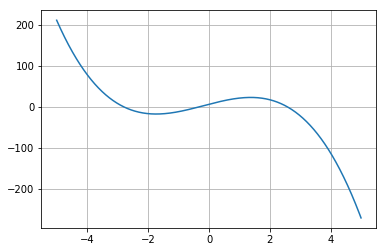

In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.array(np.arange(-5, 5, step=0.01))
y = -1*(2.7 * x**3) - (1.48 * x**2) + (19.23 * x) + 6.35
plt.plot(x, y)
plt.grid()
plt.show()

In [19]:
import sys

print('Для ввода с клавиатуры нажмите 1, для чтения из файла - 2')
input_file = open('lab1input.txt', 'r')
input_mode = True
is_ok = True

try:
    inputted = int(input())
    if (inputted == 1):
        input_mode = True
    elif (inputted == 2):
        input_mode = False
    else:
        print('Ошибка. Пожалуйста, попробуйте еще раз.')
        sys.exit(0)
except ValueError as exc:
    print('Ошибка. Пожалуйста, попробуйте еще раз.')
    sys.exit(0)

while(True):
    try:
        is_ok = True
        if (input_mode):
            print ('Введите a:')
            a = float(input())
            print ('Введите b:')
            b = float(input())
            if (a > b):
                print('a не может быть больше чем b. Попробуйте еще раз.')
                is_ok = False
                #sys.exit(0)
            print ('Введите eps:')
            eps = float(input())
        else:
            a = float(input_file.readline())
            b = float(input_file.readline())
            eps = float(input_file.readline())
            if (a > b):
                print('a не может быть больше чем b. Попробуйте еще раз.')
                is_ok = False
                #sys.exit(0)
    except ValueError as exc:
        print('Неправильный формат данных. Попробуйте еще раз.')
        is_ok = False
        #sys.exit(0)
    
    if(is_ok):

        print ('Вычисление методом половинного деления')
    
        bisec(a, b, eps)
              
        print('Вычисление методом Ньютона')
              
        newton(a, b, eps)

        break

Для ввода с клавиатуры нажмите 1, для чтения из файла - 2
1
Введите a:
0
Введите b:
0
Введите eps:
0.000001
Вычисление методом половинного деления
Для вывода результатов на экран нажмите 1, в файл - 2
1
x = 0, y(x) = 6.3500000000, итераций 0
Вычисление методом Ньютона
Для вывода результатов на экран нажмите 1, в файл - 2
1
f(a) = 6.35

f''(a) = -2.96

f(b) = 6.35

f''(b) = -2.96

x = -0.3268935798430861, y(x) = 0.0000000000, итераций 3


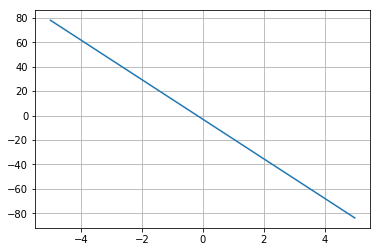

In [10]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.array(np.arange(-5, 5, step=0.01))
y = (-6*2.7 * x) - 2*1.48
plt.plot(x, y)
plt.grid()
plt.show()